Import Libraries

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import numpy as np
import seaborn as sns


Load the Dataset

In [21]:
iris_data = pd.read_csv('IRIS.csv')
iris_data.head(150) # Call head on the DataFrame 'iris_data'
test_acco=[]
train_acco=[]

Summarize the dataset

<Axes: >

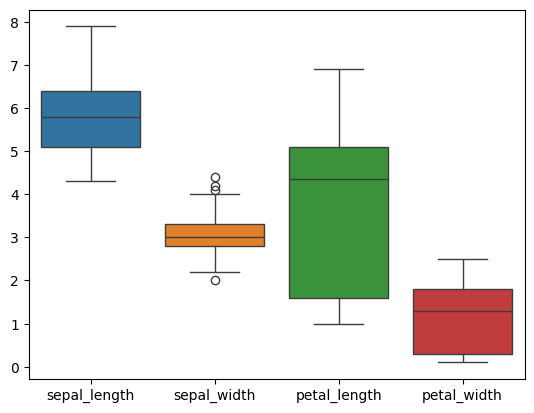

In [41]:
sns.boxplot(iris_data)

In [22]:
# dimensions (no. of rows & columns)
print(iris_data.shape)
# list of columns/features
print(iris_data.columns)
# peek some data
print(iris_data.head(10))
# statistical summary
print(iris_data.describe())

(150, 5)
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
me

Specify the target variable and its
distribution

In [23]:

# target variable
target = iris_data['species']
# distribution of class labels or categories
print(pd.value_counts(target))
# alternative of finding class distribution
print(iris_data.groupby('species').size())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64
species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_14040\4089311265.py:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(target))


Split dataset into training and test data

In [24]:

seed = 7
train_data, test_data = train_test_split(iris_data, test_size=0.3,
random_state= 7)
# shape of the datasets
print('\nShape of training data :',train_data.shape)
print('\nShape of testing data :',test_data.shape)
# class distribution of the training data
print(pd.value_counts(train_data['species']))
# class distribution of the test data
print(pd.value_counts(test_data['species']))


Shape of training data : (105, 5)

Shape of testing data : (45, 5)
species
Iris-setosa        38
Iris-versicolor    34
Iris-virginica     33
Name: count, dtype: int64
species
Iris-virginica     17
Iris-versicolor    16
Iris-setosa        12
Name: count, dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_14040\2223403742.py:8: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(train_data['species']))
C:\Users\USER\AppData\Local\Temp\ipykernel_14040\2223403742.py:10: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(test_data['species']))


Balanced split of the dataset

In [25]:
seed = 7
train_data, test_data = train_test_split(iris_data, test_size=0.3,
random_state=seed, stratify=target)

Separate the independent and target
variables

In [26]:
# separate the independent and target variables from training data
train_x = train_data.drop(columns=['species'],axis=1)
train_y = train_data['species']
# separate the independent and target variables from test data
test_x = test_data.drop(columns=['species'],axis=1)
test_y = test_data['species']

In [46]:
from sklearn.preprocessing import normalize
normalize(train_x, norm='l2', axis=1, copy=True)
# normalize(train_y, norm='l2', axis=1, copy=True)
normalize(test_x, norm='l2', axis=1, copy=True)


array([[0.78258054, 0.38361791, 0.4603415 , 0.16879188],
       [0.77011854, 0.35349703, 0.50499576, 0.16412362],
       [0.71414125, 0.26647062, 0.61821183, 0.19185884],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.75916547, 0.37183615, 0.51127471, 0.15493173],
       [0.77964883, 0.58091482, 0.22930848, 0.0458617 ],
       [0.72785195, 0.32870733, 0.56349829, 0.21131186],
       [0.71718148, 0.31640359, 0.58007326, 0.22148252],
       [0.73122464, 0.31338199, 0.56873028, 0.20892133],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.80597792, 0.52151512, 0.26865931, 0.07901744],
       [0.69589887, 0.34794944, 0.57629125, 0.25008866],
       [0.76693897, 0.57144472, 0.28572236, 0.06015208],
       [0.73260391, 0.36029701, 0.55245541, 0.1681386 ],
       [0.71524936, 0.40530797, 0.53643702, 0.19073316],
       [0.76701103, 0.35063361, 0.51499312, 0.15340221],
       [0.69276796, 0.31889319, 0.61579374, 0.1979337 ],
       [0.76434981, 0.35581802,

Decession Tree

In [27]:


# create a classifier object/model
model=tree.DecisionTreeClassifier()
# train the model with fit function
model.fit(train_x, train_y)


DecisionTreeClassifier()

Make predictions

In [28]:
# make predictions on training data
predictions_train = model.predict(train_x)
train_Sc=accuracy_score(train_y, predictions_train)*100
train_acco.append(train_Sc)
print('\nTraining Accuracy :', train_Sc)
# make predictions on test data
predictions_test = model.predict(test_x)
test_Sc=accuracy_score(test_y, predictions_test)*100
test_acco.append(test_Sc)
print('\nTest Accuracy :',test_Sc)


Training Accuracy : 100.0

Test Accuracy : 93.33333333333333


Logistic Regression

In [29]:


# Create a Logistic Regression classifier object/model
model = LogisticRegression(max_iter=1000)  # You might need to increase max_iter

# Train the model using the fit function
model.fit(train_x, train_y)

LogisticRegression(max_iter=1000)

In [30]:
# make predictions on training data
predictions_train = model.predict(train_x)
train_Sc=accuracy_score(train_y, predictions_train)*100
train_acco.append(train_Sc)
print('\nTraining Accuracy :', train_Sc)
# make predictions on test data
predictions_test = model.predict(test_x)
test_Sc=accuracy_score(test_y, predictions_test)*100
test_acco.append(test_Sc)
print('\nTest Accuracy :',test_Sc)


Training Accuracy : 97.14285714285714

Test Accuracy : 93.33333333333333


kNN


In [31]:


# Create a kNN classifier object/model
model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k)

# Train the model using the fit function
model.fit(train_x, train_y)

KNeighborsClassifier()

In [32]:
# make predictions on training data
predictions_train = model.predict(train_x)
train_Sc=accuracy_score(train_y, predictions_train)*100
train_acco.append(train_Sc)
print('\nTraining Accuracy :', train_Sc)
# make predictions on test data
predictions_test = model.predict(test_x)
test_Sc=accuracy_score(test_y, predictions_test)*100
test_acco.append(test_Sc)
print('\nTest Accuracy :',test_Sc)


Training Accuracy : 98.09523809523809

Test Accuracy : 95.55555555555556


SVM

In [33]:
# Create an SVM classifier object/model
model = SVC()  # You can specify kernel, C, gamma, etc.

# Train the model using the fit function
model.fit(train_x, train_y)

SVC()

In [34]:
# make predictions on training data
predictions_train = model.predict(train_x)
train_Sc=accuracy_score(train_y, predictions_train)*100
train_acco.append(train_Sc)
print('\nTraining Accuracy :', train_Sc)
# make predictions on test data
predictions_test = model.predict(test_x)
test_Sc=accuracy_score(test_y, predictions_test)*100
test_acco.append(test_Sc)
print('\nTest Accuracy :',test_Sc)


Training Accuracy : 96.19047619047619

Test Accuracy : 91.11111111111111


In [39]:
models = ['Decession Tree', 'Logistic Regression', 'kNN', 'Support Vector Machine']

df = pd.DataFrame({
    'Model': models,
    'Training Accuracy': train_acco,
    'Test Accuracy': test_acco
})


print(df)


                    Model  Training Accuracy  Test Accuracy
0          Decession Tree         100.000000      93.333333
1     Logistic Regression          97.142857      93.333333
2                     kNN          98.095238      95.555556
3  Support Vector Machine          96.190476      91.111111


In [37]:
# x = np.arange(len(models))
# width = 0.35

# fig, ax = plt.subplots(figsize=(8,6))
# rects1 = ax.bar(x - width/2, train_acco, width, label='Training Accuracy', color='blue')
# rects2 = ax.bar(x + width/2, test_acco, width, label='Test Accuracy', color='green')

# # Add labels and title
# ax.set_xlabel('Model')
# ax.set_ylabel('Accuracy')
# ax.set_title('Training vs Test Accuracy Comparison')
# ax.set_xticks(x)
# ax.set_xticklabels(models)
# ax.legend()

# # Display the plot
# plt.show()